# Applying Machine Learning Algorithms to a video game dataset.

## This project applies various machine learning algorithms to data from the video game 'Fifa 19'. This is split into two parts: 

### Part 1: Discreet Data

#### Here Machine learning algorithms which predict discreet (catagorical) data are used to predict the player's position (which role they usually play within a team

### Part 2: Continuous data

#### Here Machine learning algorithms which predict continuous (numeric) data are used to predict the player's value (How much they are 'worth' in the game)

# The Data: 

#### This Dataset is from the website Kaggle. It contains data from the video game 'Fifa 19'. This is a football simulation game, so the data relates specifically to the in-game attributes of the players. Each player within the game has an associated set of attributes, which are intended to represent the players real-life qualities. As the clubs and players in the game represent those in real life, they are intended to represent the players actual qualities as far as possible. 

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [153]:
df = pd.read_csv('fifa_data.csv')

In [154]:
df.head(5)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


# Data Cleaning. 

#### In order to make the dataset as easy to analyse as possible, we must first clean the data. 

In [155]:
#drop unnecessary columns
df.drop(["Unnamed: 0","Photo","Flag","Club Logo","Jersey Number","Real Face","Body Type","LS","ST","RS","LW","LF","CF","RF","RW","LAM","CAM","RAM","LM","LCM","CM","RCM","RM","LWB","LDM","CDM","RDM","RWB","LB","LCB","CB","RCB","RB",'Loaned From','Joined','Special','Weight'],axis=1,inplace=True)

In [156]:
#to simplify dataset, create one metric which captures golakeeping ability
df['GoalkeeperRating'] = (df.GKKicking + df.GKDiving + df.GKHandling + df.GKPositioning + df.GKReflexes ) / 5

In [157]:
#drop redundant goalkeeper attribute points
df.drop(['GKReflexes','GKPositioning','GKDiving','GKHandling','GKKicking'],axis=1,inplace=True)

In [158]:
#simplify positions by grouping them
def f(row):
    if row['Position'] == 'RWB':
        val = 'FB'
    elif row['Position'] == 'LWB':
        val = 'FB'
    elif row['Position'] == 'LB':
        val = 'FB'
    elif row['Position'] == 'RB':
        val = 'FB'
    elif row['Position'] == 'RCB':
        val = 'CB'
    elif row['Position'] == 'LCB':
        val = 'CB'
    elif row['Position'] == 'LDM':
        val = 'DM'
    elif row['Position'] == 'CDM':
        val = 'DM'
    elif row['Position'] == 'RDM':
        val = 'DM'
    elif row['Position'] == 'RCM':
        val = 'CM'
    elif row['Position'] == 'LCM':
        val = 'CM'
    elif row['Position'] == 'LF':
        val = 'WG'
    elif row['Position'] == 'LW':
        val = 'WG'
    elif row['Position'] == 'LM':
        val = 'WG'
    elif row['Position'] == 'RM':
        val = 'WG'
    elif row['Position'] == 'RW':
        val = 'WG'
    elif row['Position'] == 'RF':
        val = 'WG'
    elif row['Position'] == 'RS':
        val = 'ST'
    elif row['Position'] == 'LS':
        val = 'ST'
    elif row['Position'] == 'CF':
        val = 'ST'
    elif row['Position'] == 'LAM':
        val = 'CAM'
    elif row['Position'] == 'RAM':
        val = 'CAM'
    else:
        val = row['Position']
    return val

#create new column 'simplified poisiton' using the function above
df['SimplifiedPosition'] = df.apply(f, axis=1)

In [159]:
#lets take a look at the values in this new column
sorted_df = df.sort_values(by='SimplifiedPosition', ascending=False)
sorted_df['SimplifiedPosition'].value_counts()

CB     3088
WG     3001
FB     2778
ST     2636
CM     2180
GK     2025
DM     1439
CAM    1000
Name: SimplifiedPosition, dtype: int64

In [160]:
#sum the null values to check that there are no blanks
print(df['SimplifiedPosition'].isna().sum().sum())

60


In [161]:
#as there are only 60 null values in a large dataset, the 'cleanest' method is to drop them
df.dropna(inplace=True)

# Data Exploration

When exploring the data, we are looking for attributes which 'stand out' as being particularly high or low for one position, as this will give us an indication of the attributes which are more/less inmportant. 

The code below groups the rows according to their 'simplified' position and returns the mean for the attribute specified. By changing this value, we can explore which attributes tend to score more highly amongst different positions. 

In [162]:
position_group = df.groupby('SimplifiedPosition')
position_group_attribute = position_group.LongShots.mean().sort_values
print(position_group_attribute)

<bound method Series.sort_values of SimplifiedPosition
CAM    60.265795
CB     34.704482
CM     57.636089
DM     54.334340
FB     45.147173
GK     12.535789
ST     59.753506
WG     57.875229
Name: LongShots, dtype: float64>


We can do this in a more systematic way. By creating a new dataframe using the groupby, we can examine the attributes in more detail. 

In [163]:
position_group = df.groupby('SimplifiedPosition')
position_group_attribute = pd.DataFrame(df.groupby('SimplifiedPosition').mean())
#drop columns which are not specific attributes
position_group_attribute.drop(['Age','ID','Overall','Potential','International Reputation'],axis=1,inplace=True)
position_group_attribute 

,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,...,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GoalkeeperRating
SimplifiedPosition,,,,,,,,,,,,,,,,,,,,,
CAM,3.216776,2.969499,59.940087,59.385621,49.092593,67.572985,55.821351,68.140523,61.309368,58.171024,...,51.561002,39.643791,62.199346,66.047930,58.178649,63.210240,40.057734,41.416122,38.965142,10.510022
CB,2.792717,2.027311,40.680672,30.714286,65.776961,57.142857,32.384804,44.191176,36.370798,34.778011,...,66.961835,64.735994,35.115546,41.819328,41.619398,58.603291,65.140056,67.742297,65.309874,10.567507
CM,3.082157,2.607359,56.585685,51.821573,52.880040,68.606855,49.666331,63.787802,56.104335,53.340726,...,62.701109,57.722782,58.283770,63.818044,53.436492,62.139113,56.571069,58.810988,55.702117,10.493851
DM,2.999245,2.405283,53.680000,46.546415,57.586415,68.612075,45.012075,60.808302,51.533585,49.853585,...,68.692075,64.869434,52.987925,60.852075,51.539623,62.500377,63.566038,65.855094,62.566792,10.651925
FB,2.857475,2.417119,62.926026,40.057320,55.663826,61.531371,39.283888,61.455074,51.438033,43.619287,...,63.903563,62.754841,53.746321,51.206042,45.546476,58.274206,62.447715,65.469791,64.596824,10.513013
GK,2.490526,1.000000,14.254737,11.914737,14.344737,27.225263,12.322105,13.814737,14.645263,14.431053,...,26.382105,16.977368,11.197895,37.032105,19.884211,45.009474,15.237368,14.109474,14.042105,63.615895
ST,3.093498,2.589460,47.268168,66.748831,63.147471,58.381215,58.175521,63.384615,51.748831,44.810030,...,52.898428,26.776881,65.621334,55.603485,63.051849,60.620909,29.690183,25.958351,23.333617,10.522057
WG,3.145688,2.933211,62.402569,59.954128,49.078165,63.895413,53.817248,68.678899,58.749725,51.921468,...,50.334679,36.592661,62.249908,61.042936,56.537615,60.357431,39.768440,37.717064,35.729174,10.497615


In [164]:
#transpose the data for a better view
position_group_attribute=position_group_attribute.transpose()

#round the dataframe for readability
position_group_attribute = position_group_attribute.round(0)

position_group_attribute

SimplifiedPosition,CAM,CB,CM,DM,FB,GK,ST,WG
Weak Foot,3.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0
Skill Moves,3.0,2.0,3.0,2.0,2.0,1.0,3.0,3.0
Crossing,60.0,41.0,57.0,54.0,63.0,14.0,47.0,62.0
Finishing,59.0,31.0,52.0,47.0,40.0,12.0,67.0,60.0
HeadingAccuracy,49.0,66.0,53.0,58.0,56.0,14.0,63.0,49.0
ShortPassing,68.0,57.0,69.0,69.0,62.0,27.0,58.0,64.0
Volleys,56.0,32.0,50.0,45.0,39.0,12.0,58.0,54.0
Dribbling,68.0,44.0,64.0,61.0,61.0,14.0,63.0,69.0
Curve,61.0,36.0,56.0,52.0,51.0,15.0,52.0,59.0
FKAccuracy,58.0,35.0,53.0,50.0,44.0,14.0,45.0,52.0


We can graph this dataframe to easily identify the differences in the average attributes: 

<AxesSubplot:>

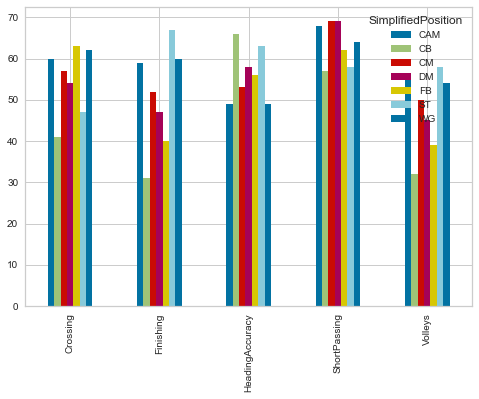

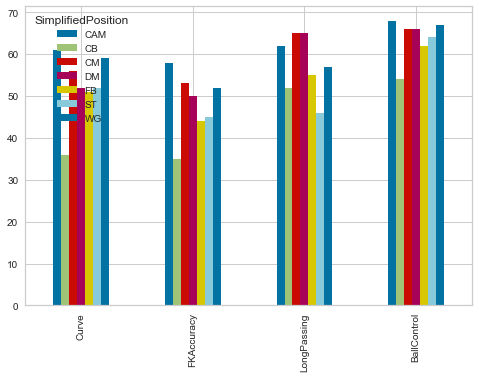

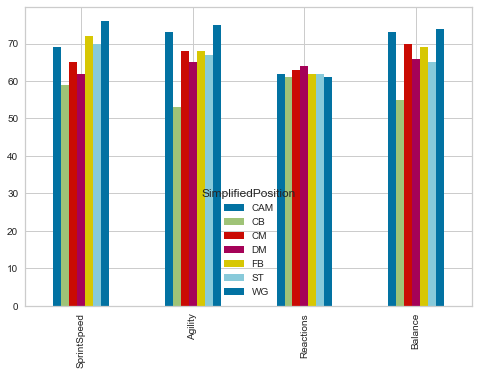

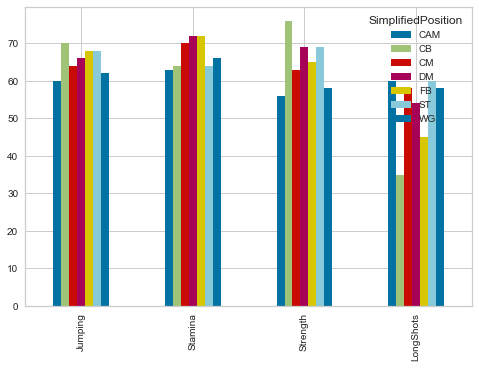

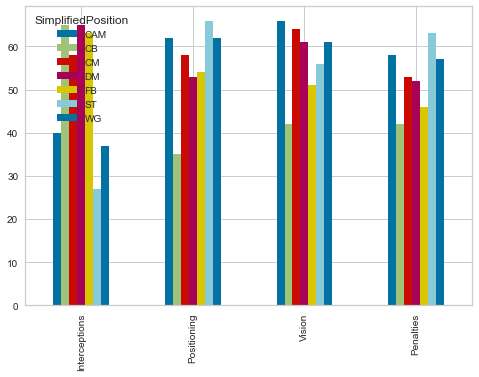

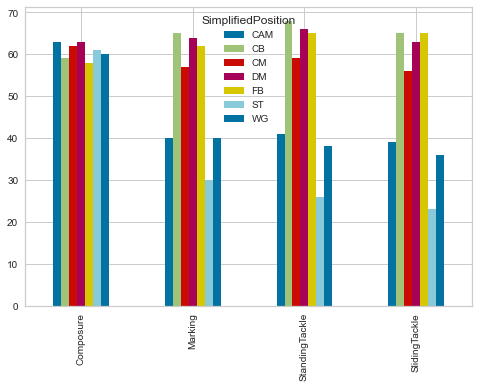

In [165]:
#create temporary df to make it easier to visually represent the columns 
temp_position_group_attribute = position_group_attribute

#drop GK column, as Goalkeepers are already easily distinguished in the columns and are a big outlier when left in
temp_position_group_attribute.drop(['GK'],axis=1,inplace=True)

#drop Skill moves and weak foot columns as they are on a different scale
#drop Goalkeeper rating as goalkeepers are not being assessed in this graph
temp_position_group_attribute.drop(['Weak Foot','Skill Moves','GoalkeeperRating'],axis=0,inplace=True)

#split the data in half to make it easier to view
graph_1 = temp_position_group_attribute.iloc[:5]
graph_2 = temp_position_group_attribute.iloc[6:10]
graph_3 = temp_position_group_attribute.iloc[11:15]
graph_4 = temp_position_group_attribute.iloc[16:20]
graph_5 = temp_position_group_attribute.iloc[21:25]
graph_6 = temp_position_group_attribute.iloc[25:]


#plot the data
graph_1.plot(kind='bar')
graph_2.plot(kind='bar')
graph_3.plot(kind='bar')
graph_4.plot(kind='bar')
graph_5.plot(kind='bar')
graph_6.plot(kind='bar')

# Part 1: Predicting a players position

#### From our exploration above, we can design metrics used to asses the player relative strengths. We have to take some decisions here about which metrics to use, something of a value judgement. To design my metrics, I have selected attributes for which at least one position scores very well or very badly. By using attributes which vary greatly by position, we have a better chance of classifying the data. 

In [166]:
#add the following columns to the dataframe

#this creates a new column in the dataframe using the existing values, to judge the relative strengths
df['Finishing_Marking'] = (df.Finishing / df.Marking )

df['Agility_Strength'] = (df.Agility / df.Strength )
df['Dribbling_StandTackle'] = (df.Dribbling / df.StandingTackle)
df['GoalkeeperRating_Overall'] = (df.GoalkeeperRating / df.Overall)
df['Vision_Finishing'] = (df.Vision / df.Finishing)
df['Acceleration_Stamina'] = (df.Acceleration / df.Stamina)

We can visualise these to help check the level of seperation

<AxesSubplot:xlabel='Vision_Finishing', ylabel='Dribbling_StandTackle'>

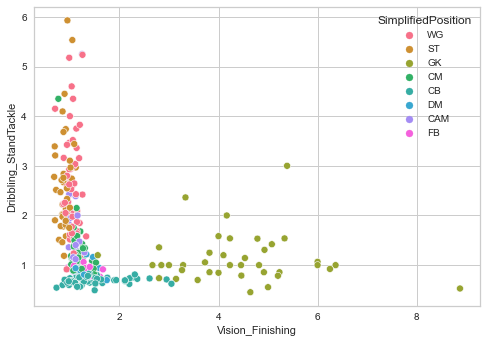

In [167]:
#use a smaller version of the DF, as thousands of records are visually confusing
short_df = df.head(300)
sns.scatterplot(x = 'Vision_Finishing', y = 'Dribbling_StandTackle', data=short_df, hue = 'SimplifiedPosition' )

<AxesSubplot:xlabel='Agility_Strength', ylabel='Finishing_Marking'>

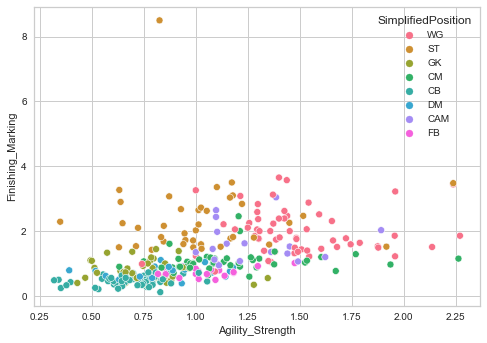

In [168]:
sns.scatterplot(x = 'Agility_Strength', y = 'Finishing_Marking', data=short_df, hue = 'SimplifiedPosition' )

# KNN model

#### To predict the positions, we will initially use the KNN model, which looks at the values associated with the nearest neighbours.

In [169]:
#create the feature and target variables

fifa_feature_data = df[['Finishing_Marking','Agility_Strength','Dribbling_StandTackle','GoalkeeperRating_Overall','Vision_Finishing','Acceleration_Stamina']]
fifa_target_data = df[['SimplifiedPosition']]

#create the x and y variables 
x = fifa_feature_data
y = fifa_target_data

#import the classifying algorithmn, set nearest neighbours equal to 4 to begin with
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)

#import the train-test-split, which we will use to evaluate our model
from sklearn.model_selection import train_test_split
x_train,x_test , y_train, y_test = train_test_split(x,y, test_size = 0.4, random_state = 4)

#fit the testing data
knn.fit(x_train,y_train)

#use the test data to check how accurate the predictins were:
import sklearn.metrics as metrics
y_predict_Knn4 = knn.predict(x_test)
#compares the predicted values with the observed values
accuracy_KNN = metrics.accuracy_score(y_test,y_predict_Knn4)

print('Accuracy score of KNN model = '+str(round(accuracy_KNN,2)))

<ipython-input-169-246ed5187f14>:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_train,y_train)


Accuracy score of KNN model = 0.63


We can refine this model further by finding the best value for 'K' (the number of neighbours the model uses to evaluate)

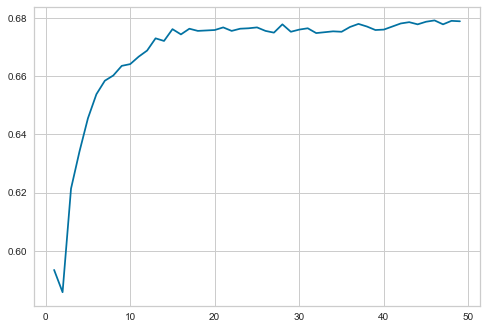

In [170]:
k_range = range(1,50)

scores = []

#use a for-loop to test each value of K 

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train , np.ravel(y_train))
    y_pred = knn.predict(x_test)
    accuracy = metrics.accuracy_score(y_test,y_pred)
    scores.append(accuracy)

#plot the values to visualise the accuracy results

plt.plot(k_range,scores)

As we can see, the accuracy increases until we reach a value of 15, at which point a platau is reached. 15 therefore seems a reasonable number of neighbours to choose. 

To better understand the areas in which the model has mis-specified, we can use the Confusion Matrix.

0.678882547311505

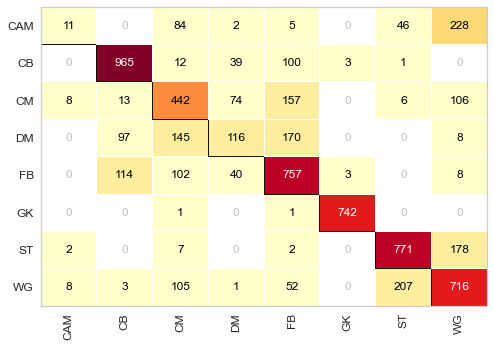

In [171]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(knn)
#this compares the predicted and the observed values
cm.fit(x_train , np.ravel(y_train))
cm.score(x_test, np.ravel(y_test))

We can see that there a quite a lot of case sin which a 'CAM' was predicted, but the observed value was 'WG'. To help the moddel differentiate the two positions, we add another variable, for which we would expect a 'WG' to have a value > 1, but a CAM to have a value < 1.



In [172]:
df['SprintSpeed_FKAccuracy'] = (df.SprintSpeed / df.FKAccuracy)

This time, we can use cross validation, to make sure that our test results aren't biased by an unrepresentative sample. 

In [173]:
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier


#create the feature and target variables

fifa_feature_data_2 = df[['Finishing_Marking','Agility_Strength','Dribbling_StandTackle','GoalkeeperRating_Overall','Vision_Finishing','Acceleration_Stamina','SprintSpeed_FKAccuracy']]
fifa_target_data_2 = df[['SimplifiedPosition']]

#create the x and y variables 
x = fifa_feature_data_2
y = fifa_target_data_2

#Use the value of 15 learned from the previous experiment
clf = KNeighborsClassifier(n_neighbors=15)

cv1 = cross_validate(clf, x, np.ravel(y), cv=6)
print(cv1['test_score'])

[0.68421053 0.68060562 0.68240807 0.66186013 0.66726748 0.65813199]


It looks like the extra attribute has slightly increased the success rate of our model. 

# Logistic Regression

#### To see if better results can be achieved using a different machine-learning method, we can use Logistic regression

In [174]:
from sklearn.linear_model import LogisticRegression

#re-use the train test split code to make sure they reference the new values
x_train,x_test , y_train, y_test = train_test_split(x,y, test_size = 0.4, random_state = 4)

logreg=LogisticRegression()

#fits the training data
logreg.fit(x_train , np.ravel(y_train))

#create a variable to store the predicted values of y
y_pred = logreg.predict(x_test)

#compare these values to the observed y_test values
accuracy_logistic = metrics.accuracy_score(y_test,y_pred)

print('Accuracy score of LR model = '+str(round(accuracy_logistic,2)))

Accuracy score of LR model = 0.69


C:\Users\jowen\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


As we can see, using the logistic regression gives a similar score to the KNN model. 

# Decision Tree Algorithm

#### There is one further machine learning algorithym we can try, which is the decision tree algorithym. This attempts to classify the data by moving through it sequentially, classifying the data as it moves through based on which offers the highest information gain. By creating new catagories for the model which give it a lot of information about the player, the model should be able to create the decision tree. 

#### To do this, we must first manipulate our data to make it easier to use.

In [175]:
#remove CAM, as it has very few players and it is difficult to seperate as shown above
def f(row):
    if row['SimplifiedPosition'] == 'CAM':
        val = 'CM'
    if row['SimplifiedPosition'] == 'DM':
        val = 'CM'
    else:
        val = row['SimplifiedPosition']
    return val

df['SimplifiedPosition'] = df.apply(f, axis=1)

#create an 'attacker of defender' metric, which is a bollean showing true if 
#the players 'attacking' stats are greater than the defensive stats

df['Attacker'] = (df.Marking + df.SlidingTackle) / (df.Finishing +df.Dribbling)
df['Attacker'] =  np.where(df['Attacker'] < 1 , True, False)

#create a 'wide player or central player' metric, which decribes if the player has attributes which suit a wide position
# (agility/balance etc) or attributes which lends themselves to a central position (strngth, stamina etc)
df['WidePlayer'] = (df.Acceleration + df.Agility) / (df.Strength +df.Aggression)
df['WidePlayer'] =  np.where(df['WidePlayer'] < 1 , True, False)

#create a metric which identifies the goalkeepers:
df['GoalKeeper'] =  np.where(df['GoalkeeperRating'] > 50 , True, False)

#create the feature and target variables

fifa_feature_data_3 = df[['WidePlayer','GoalKeeper','Attacker']]
fifa_target_data_3 = df[['SimplifiedPosition']]

#create the x and y variables 
x = fifa_feature_data_3
y = fifa_target_data_3

#re-use the train test split code to make sure they reference the new values
x_train,x_test , y_train, y_test = train_test_split(x,y, test_size = 0.4, random_state = 4)



[Text(279.0, 261.6075, 'X[1] <= 0.5\ngini = 0.844\nsamples = 9985\nvalue = [542, 1736, 1967, 1558, 1156, 1393, 1633]'),
 Text(223.2, 186.8625, 'X[2] <= 0.5\ngini = 0.818\nsamples = 8843\nvalue = [542, 1736, 1967, 1558, 14, 1393, 1633]'),
 Text(111.6, 112.1175, 'X[0] <= 0.5\ngini = 0.681\nsamples = 4578\nvalue = [21, 1724, 1246, 1468, 12, 0, 107]'),
 Text(55.8, 37.3725, 'gini = 0.576\nsamples = 1806\nvalue = [11, 172, 485, 1055, 2, 0, 81]'),
 Text(167.39999999999998, 37.3725, 'gini = 0.589\nsamples = 2772\nvalue = [10, 1552, 761, 413, 10, 0, 26]'),
 Text(334.79999999999995, 112.1175, 'X[0] <= 0.5\ngini = 0.721\nsamples = 4265\nvalue = [521, 12, 721, 90, 2, 1393, 1526]'),
 Text(279.0, 37.3725, 'gini = 0.71\nsamples = 3494\nvalue = [470, 5, 531, 79, 0, 945, 1464]'),
 Text(390.59999999999997, 37.3725, 'gini = 0.591\nsamples = 771\nvalue = [51, 7, 190, 11, 2, 448, 62]'),
 Text(334.79999999999995, 186.8625, 'gini = 0.0\nsamples = 1142\nvalue = [0, 0, 0, 0, 1142, 0, 0]')]

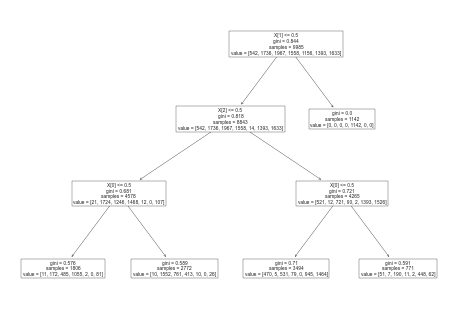

In [176]:
from sklearn import tree

clf = tree.DecisionTreeClassifier() 

#fit the model with the training data
clf=clf.fit(x_train,y_train) 

#create a variable to store the predicted values of y
y_pred = clf.predict(x_test) 

#evaluate the model by comparing predicted values to observed values

metrics.accuracy_score(y_test, y_pred)

#plot the decision tree to see the results
#plt.figure(figsize=((25,15))
tree.plot_tree(clf) 

In [177]:
#can output text from the model
from sklearn.tree import export_text
r = export_text(clf)
print(r)

|--- feature_1 <= 0.50
|   |--- feature_2 <= 0.50
|   |   |--- feature_0 <= 0.50
|   |   |   |--- class: FB
|   |   |--- feature_0 >  0.50
|   |   |   |--- class: CB
|   |--- feature_2 >  0.50
|   |   |--- feature_0 <= 0.50
|   |   |   |--- class: WG
|   |   |--- feature_0 >  0.50
|   |   |   |--- class: ST
|--- feature_1 >  0.50
|   |--- class: GK



# Unsupervised Learning: K-Means clustering

#### We can also attempt to analyse this data using an unsupervised machine learning algorithmn. However, in order to keep this simple, we will need to create a simplified form of our dataset. 

In [178]:
# further simplify positions by grouping them into just three catagories; Defender (DF), Midfielder (MF), Attacker (AT)
def f(row):
    if row['SimplifiedPosition'] == 'FB':
        val = 'DF'
    elif row['SimplifiedPosition'] == 'CB':
        val = 'DF'
    elif row['SimplifiedPosition'] == 'DM':
        val = 'MF'
    elif row['SimplifiedPosition'] == 'CM':
        val = 'MF'
    elif row['SimplifiedPosition'] == 'WG':
        val = 'AT'
    elif row['SimplifiedPosition'] == 'ST':
        val = 'AT'
    elif row['SimplifiedPosition'] == 'CAM':
        val = 'AT'
    else:
        val = row['SimplifiedPosition']
    return val

#create new column ' further simplified poisiton' using the function above
df['FurtherSimplifiedPosition'] = df.apply(f, axis=1)


#since the simplification of the postions means that we do not have to be so precise with ourr metrics, 
#we can can create two new simplified columns to more easily examine the data

df['Defending/Attincking_1'] = (df.Marking + df.SlidingTackle) / (df.Finishing +df.Crossing)
df['Defending/Attincking_2'] = (df.StandingTackle + df.Interceptions)  / (df.Dribbling +df.BallControl)

#create a new dataframe to hold this data
simplified_df = df[['Defending/Attincking_1','Defending/Attincking_2','FurtherSimplifiedPosition']]

#to further simplify, drop Goalkeepers

index_names = simplified_df[ simplified_df['FurtherSimplifiedPosition'] == 'GK' ].index
simplified_df.drop(index_names, inplace = True)


C:\Users\jowen\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:xlabel='Defending/Attincking_1', ylabel='Defending/Attincking_2'>

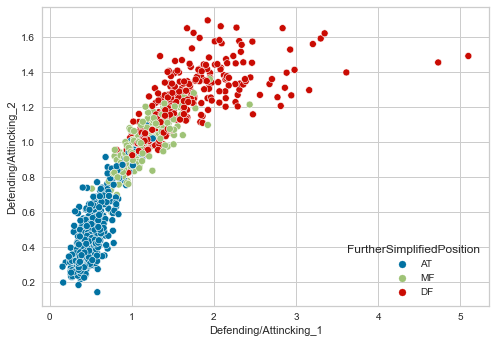

In [179]:
#plot the data to check for clusters: 
sns.scatterplot(x = 'Defending/Attincking_1', y = 'Defending/Attincking_2', data=simplified_df.head(1000), hue = 'FurtherSimplifiedPosition' )

As we can see, there is some clustering. As we are looking for three clusters, I will set k = 3

In [180]:
from sklearn.cluster import KMeans
#create the new x and y variables 

simplified_df = df[['Defending/Attincking_1','Defending/Attincking_2','FurtherSimplifiedPosition']]

#create the feature and target variables

fifa_feature_data_4 = simplified_df[['Defending/Attincking_1','Defending/Attincking_2']]
fifa_target_data_4 = simplified_df[['FurtherSimplifiedPosition']]

#create the x and y variables 
x = fifa_feature_data_4
y = fifa_target_data_4



# declare the model
model = KMeans(n_clusters=3)

# fit the model to the test data 
model.fit(x)

# Predicitng a single input

#'typical' attacker
predicted_label_1 = model.predict([[0.5,0.5]])
print(predicted_label_1)

#typical defender
predicted_label_2 = model.predict([[1.0,1.0]])
print(predicted_label_2)

#typical midefielder
predicted_label_3 = model.predict([[2,2]])
print(predicted_label_3)


[2]
[0]
[1]



# Part 2: Predicting a player's value. 

#### This data also contains a column which represents the player's 'Value', which acts a benchmark for much much it will cost to buy the player for your own team. It should be possible to predict this value based on the other attributes a players has.  

#### To do this, we must first clean the data, as neither the 'Value' nor the 'Wage' columns are integers. 

In [181]:
#we can see that the 'Value' and 'Wage' columns are not integers
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16643 entries, 0 to 18206
Data columns (total 62 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         16643 non-null  int64  
 1   Name                       16643 non-null  object 
 2   Age                        16643 non-null  int64  
 3   Nationality                16643 non-null  object 
 4   Overall                    16643 non-null  int64  
 5   Potential                  16643 non-null  int64  
 6   Club                       16643 non-null  object 
 7   Value                      16643 non-null  object 
 8   Wage                       16643 non-null  object 
 9   Preferred Foot             16643 non-null  object 
 10  International Reputation   16643 non-null  float64
 11  Weak Foot                  16643 non-null  float64
 12  Skill Moves                16643 non-null  float64
 13  Work Rate                  16643 non-null  obj

In [182]:
# wage column is relatively easy to clean, as the values are all in the format E123K

#we can simply replace the 'K' and 'E' values and convert them to integers
df['Wage'] = df['Wage'].str.replace('K', '')
df['Wage'] = df['Wage'].str.replace('€', '')
df['Wage'] = df['Wage'].astype(int)

#however, the value column is a little more difficult to clean, as some players' value
#is measured in 'K' (Thousands) and some are measured by 'M' (Millions)

#create a 'value multiplier' column to take account of the K and M values 

def f(row):
    if 'K' in row['Value']:
        val = 1000 
    elif 'M' in row['Value']:
        val = 1000000
    else:
        val = 0 
    return val

#create new column 'Value_Muliplier' using the function above
df['Value_multiplier'] = df.apply(f, axis=1)

#we can then remove the 'K' , 'M' and 'E' values

df['Value'] = df['Value'].str.replace('K', '')
df['Value'] = df['Value'].str.replace('€', '')
df['Value'] = df['Value'].str.replace('M', '')
df['Value'] = df['Value'].astype(float)

#we can then multiply this by our value_multiplier column
df['intValue']= (df.Value * df.Value_multiplier)

#convert to integer
df['intValue'] = df['intValue'].astype(int)

#drop columns used in conversion
df.drop(['Value_multiplier','Value'],axis=1,inplace=True)


#we must also convert the 'contract valid until' column to an integer
df['Contract Valid Until'] = df['Contract Valid Until'].astype(int)

#since the dataset is from 2018, we can use this to create a variable which represents the years remaining on contract
df['Contract Valid Until'] = df['Contract Valid Until'] - 2018

Next, we will explore the data to see if there are some relationships between the players attributes and their value.

<AxesSubplot:xlabel='Contract Valid Until'>

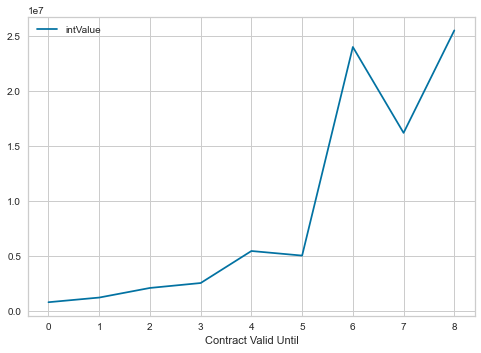

In [183]:
#plot the relationship between years remaining on contract and value
Contract_Length_Group = pd.DataFrame(df.groupby('Contract Valid Until').intValue.mean())
Contract_Length_Group.plot()

<AxesSubplot:xlabel='Age'>

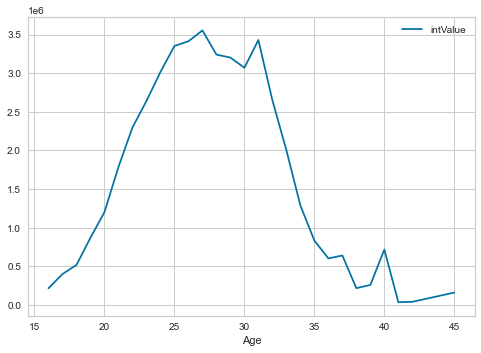

In [184]:
#plot the relationship between years remaining on contract and value
Age_Group = pd.DataFrame(df.groupby('Age').intValue.mean())
Age_Group.plot()

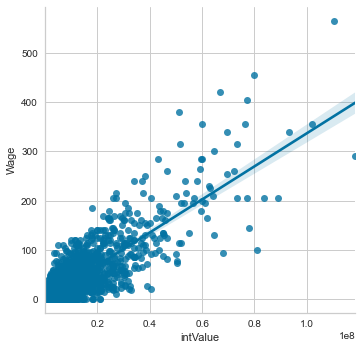

In [185]:
#plot the relationship between Value and wage
sns.lmplot(x = 'intValue', y = 'Wage', data=df  )

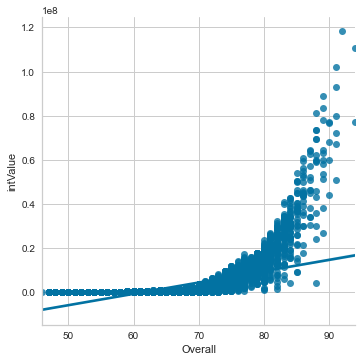

In [186]:
#plot the relationship between overall and value
sns.lmplot(x = 'Overall', y = 'intValue', data=df  )

Based on the analysis above, it looks these four data points are correlated with a players value. 

# Linear Regression

One way we can model the relationship between Value and these four values is using liner regression. 

In [187]:
#import linear regression 
from sklearn.linear_model import LinearRegression

#create a new simplified dataframe to allow for easy comparision
value_df = df[['Overall', 'Wage','Contract Valid Until','Age','intValue']].copy()
value_df.head()

,Overall,Wage,Contract Valid Until,Age,intValue
0,94,565,3,31,110500000
1,94,405,4,33,77000000
2,92,290,4,26,118500000
3,91,260,2,27,72000000
4,91,355,5,27,102000000


In [188]:
#create x and y variables 
x= value_df.drop(['intValue'],axis=1).values
y= value_df['intValue'].values

#fit the linear regression model
linreg = LinearRegression()
linreg.fit(x,y)

#predict the expected values of Y by applying the model to  observed X values 
y_pred = linreg.predict(x)



We can assess the effectiveness of this model by using the MeanSquared and MeanAbsolute error methods.

In [189]:
#import the required models
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#use the mean square error method to compare the results of the model with the real values
MSE = mean_squared_error(y, y_pred)
MAE = mean_absolute_error(y, y_pred)
RMSE = math.sqrt(MSE)

#print the results
print("MSE: ", round(MSE,2))
print("MAE: ", round(MAE,2))
print("RMSE: ", round(RMSE,2))

MSE:  6818139660734.17
MAE:  1321910.96
RMSE:  2611156.77


# Polynomial Regression

Looking closely at the graph which plots 'Value' against 'Overall', it looks as these are not linearly related. We can therefore use a polynomial regression to try and predict the values. 

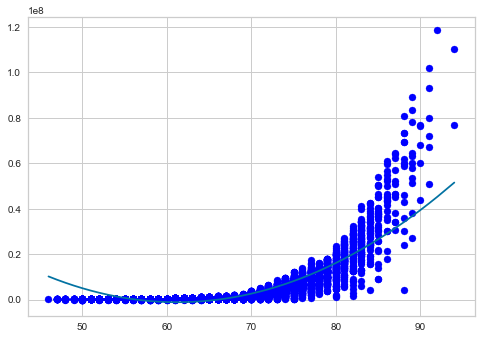

In [190]:
#import polynomial regression
from sklearn.preprocessing import PolynomialFeatures

#create the x and y variables 
x= value_df['Overall']
y= value_df['intValue']
x= x.values.reshape(-1, 1)
y= y.values.reshape(-1, 1)

#transform the x variable into a polynomial
#initially, we will pick a value of 2
poly = PolynomialFeatures(degree =2 )
x_poly = poly.fit_transform(x)

#fit the model to the data
poly.fit(x_poly,y)
lin2 = LinearRegression()
lin2.fit(x_poly,y)

#plot the results to see the model's prediction
plt.scatter(x,y ,color = 'blue')
plt.plot(x,lin2.predict(poly.fit_transform(x)))

In [191]:
#create a variable to store the predicted values of y 
y_pred = lin2.predict(poly.fit_transform(x))

#use the mean square error method to compare the results of the model with the real values
MSE = mean_squared_error(y, y_pred)
MAE = mean_absolute_error(y, y_pred)
RMSE = math.sqrt(MSE)

#print the results
print("MSE: ", round(MSE,2))
print("MAE: ", round(MAE,2))
print("RMSE: ", round(RMSE,2))

MSE:  7771541698339.96
MAE:  1514414.72
RMSE:  2787748.5


Based on the results above, it does not look like the polynomial degree of 2 is the best for the data, it is underfitting. Instead, we will choose a value of 4.

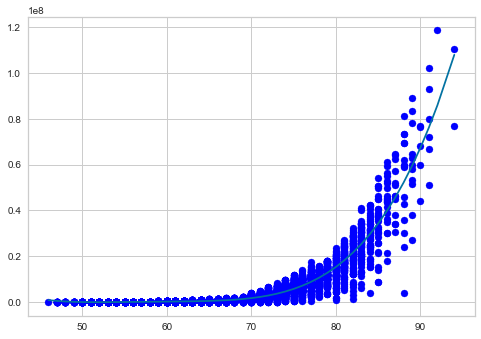

In [192]:
poly = PolynomialFeatures(degree =4)
x_poly = poly.fit_transform(x)

#fit the model to the data
poly.fit(x_poly,y)
lin2 = LinearRegression()
lin2.fit(x_poly,y)

#plot the results to see the model's prediction
plt.scatter(x,y ,color = 'blue')
plt.plot(x,lin2.predict(poly.fit_transform(x)))

In [193]:
#create a variable to store the predicted values of y 
y_pred = lin2.predict(poly.fit_transform(x))

#use the mean square error method to compare the results of the model with the real values
MSE = mean_squared_error(y, y_pred)
MAE = mean_absolute_error(y, y_pred)
RMSE = math.sqrt(MSE)

#print the results
print("MSE: ", round(MSE,2))
print("MAE: ", round(MAE,2))
print("RMSE: ", round(RMSE,2))

MSE:  3250791049390.76
MAE:  643215.94
RMSE:  1802995.02


It looks like this version of the model is a much better fit for the data, striking a balance between overfitting and underfitting. 